<a href="https://colab.research.google.com/github/Jallen101181/CS4410/blob/main/Allen_CS4410_Homework_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Joseph Brandon Allen CS4410 Homework 4

In [2]:
#Load the dataset
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()


In [3]:
#Check the sample size

cancer.data.shape

(569, 30)

In [4]:
#Check the target size

cancer.target.shape

(569,)

In [5]:
#Split the data for training and testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=11)

In [6]:
#Training size

X_train.shape

(426, 30)

In [7]:
#Testing size

X_test.shape

(143, 30)

In [8]:
#Create the model

from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

In [9]:
#Training the model

gnb.fit(X=X_train, y=y_train)

GaussianNB()

In [10]:
#Predicting

predicted = gnb.predict(X=X_test)

expected = y_test

In [11]:
predicted[:20]

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [12]:
expected[:20]

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0])

In [13]:
wrong = [(p, e) for (p, e) in zip(predicted, expected) if p!=e]

In [14]:
wrong

[(1, 0), (1, 0), (0, 1), (1, 0), (1, 0), (1, 0), (1, 0)]

In [15]:
#Estimator method score

print(f'{gnb.score(X_test, y_test):.2%}')

95.10%


In [16]:
#Confusion matrix
from sklearn.metrics import confusion_matrix

In [17]:
confusion = confusion_matrix(y_true=expected, y_pred=predicted)

In [18]:
confusion

array([[44,  6],
       [ 1, 92]])

In [19]:
#Classification report
from sklearn.metrics import classification_report

In [20]:
names = [str(cancer) for cancer in cancer.target_names]

In [21]:
print(classification_report(expected, predicted, target_names=names))

              precision    recall  f1-score   support

   malignant       0.98      0.88      0.93        50
      benign       0.94      0.99      0.96        93

    accuracy                           0.95       143
   macro avg       0.96      0.93      0.94       143
weighted avg       0.95      0.95      0.95       143



In [22]:
#Visualizing the confusion matrix
import pandas as pd

In [23]:
confusion_df = pd.DataFrame(confusion, index=range(2),
                            columns=range(2))

In [24]:
import seaborn as sns

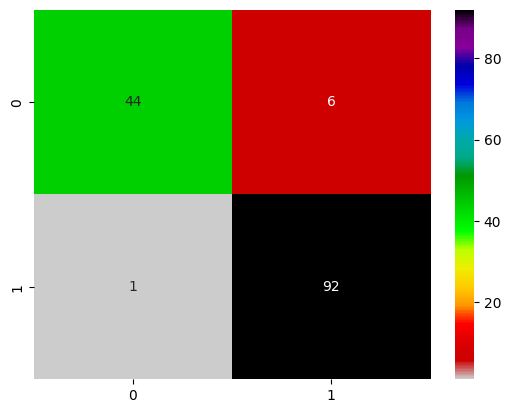

In [25]:
axes = sns.heatmap(confusion_df, annot=True,
                   cmap='nipy_spectral_r')

In [26]:
#Kfold cross validation
from sklearn.model_selection import KFold

In [27]:
kfold = KFold(n_splits=10, random_state=11, shuffle=True)

In [28]:
from sklearn.model_selection import cross_val_score

In [29]:
scores = cross_val_score(estimator=gnb, X=cancer.data,
                         y=cancer.target, cv=kfold)

In [30]:
scores

array([0.96491228, 0.9122807 , 0.94736842, 0.89473684, 0.96491228,
       0.94736842, 0.96491228, 0.89473684, 0.96491228, 0.92857143])

In [31]:
print(f'Mean accuracy: {scores.mean():.2%}')

Mean accuracy: 93.85%


In [32]:
print(f'Accuracy standard deviation: {scores.std():.2%}')

Accuracy standard deviation: 2.75%


In [33]:
#Run multiple models to find the best one (with logistic regression)
from sklearn.svm import SVC

In [34]:
from sklearn.neighbors import KNeighborsClassifier

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
estimators = {
    'GaussianNB': gnb,
    'KNeighborsClassifier': KNeighborsClassifier(),
    'SVC': SVC(gamma='scale'),
    'LogisticRegression': LogisticRegression(solver='lbfgs', multi_class='ovr', max_iter=10000)
}

In [37]:
for estimator_name, estimator_object in estimators.items():
  kfold = KFold(n_splits=10, random_state=True, shuffle=True)
  scores = cross_val_score(estimator=estimator_object,
                           X=cancer.data, y=cancer.target, cv=kfold)
  print(f'{estimator_name:>20}: ' +
        f'mean accuracy={scores.mean():.2%}; ' +
        f'standard deviation={scores.std():.2%}')

          GaussianNB: mean accuracy=94.20%; standard deviation=2.61%
KNeighborsClassifier: mean accuracy=92.96%; standard deviation=3.94%
                 SVC: mean accuracy=91.38%; standard deviation=4.31%
  LogisticRegression: mean accuracy=94.90%; standard deviation=3.37%
